In [20]:
import shap
import lime
import torch
import numpy as np
import pandas as pd
import networkx as nx
import torch.nn as nn
import seaborn as sns
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from lime import lime_tabular
from torch_geometric.data import Data
from sklearn.model_selection import KFold
from torch_geometric.nn import GCNConv, GATConv
from torch_geometric.explain import GNNExplainer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from torch_geometric.loader import DataLoader as GeometricDataLoader
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

In [21]:
# Define Advanced GNN Model
class AdvancedGNNModel(torch.nn.Module):
    def __init__(self, num_node_features, num_classes, dropout):
        super(AdvancedGNNModel, self).__init__()
        self.conv1 = GCNConv(num_node_features, 64)
        self.conv2 = GATConv(64, 128, heads = 4, concat = True)
        self.conv3 = GCNConv(128 * 4, 64)  # GAT outputs heads*hidden channels
        self.fc1 = torch.nn.Linear(64, 32)
        self.fc2 = torch.nn.Linear(32, num_classes)
        self.dropout = nn.Dropout(p = dropout)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)
        x = F.relu(self.conv2(x, edge_index))
        x = self.dropout(x)
        x = F.relu(self.conv3(x, edge_index))
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
def visualize_graph(edge_index, num_nodes = 12):
    """
    Visualize a subgraph consisting of 'num_nodes' nodes and their corresponding edges.
    """
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    for i, j in edge_index.t().tolist():
        if i < num_nodes and j < num_nodes:
            G.add_edge(i, j)
    plt.figure(figsize=(12, 8))
    nx.draw(G, with_labels = True, node_color = 'skyblue', node_size = 700, edge_color = 'k')
    plt.title(f'Subgraph with {num_nodes} Nodes')
    plt.show()

def create_custom_edge_index():
    """
    Create custom edge index based on edge list.
    """
    custom_edges = [
        (0, 10), (1, 10), (2, 5), (2, 7), (2, 10), (2, 11),
        (3, 10), (4, 10), (5, 8), (6, 10), (7, 8), (8, 9), (8, 11)
    ]
    edges = []
    for edge in custom_edges:
        i, j = edge
        edges.append([i, j])
        edges.append([j, i])  # Undirected graph
    return torch.tensor(edges, dtype=torch.long).t().contiguous()

# Create Data objects for training and testing sets
def create_graph_data(features, labels):
    edge_index = create_custom_edge_index()  # Custom edge index for all graphs
    data = Data(x = features, edge_index = edge_index, y = labels)
    return data

In [22]:
# Load and preprocess the data
InputData = pd.read_csv('Dataset_spine_clean.csv')
node_features = torch.tensor(InputData.iloc[10:305, 1:13].values, dtype=torch.float)
labels = torch.tensor(InputData.iloc[10:305, 14].values, dtype=torch.long)

CROSS VALIDATION

Fold 1/5
(1) Training with params: weight_decay = 0.0001, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 70
(2) Training with params: weight_decay = 1e-05, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 71
(3) Training with params: weight_decay = 1e-06, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 85
(4) Training with params: weight_decay = 0.0001, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 76
(5) Training with params: weight_decay = 1e-05, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 103
(6) Training with params: weight_decay = 1e-06, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 71
(7) Training with params: weight_decay = 0.0001, learning_rate = 0.0005, dropout = 0.5
    Early stopping at epoch 69
(8) Training with params: weight_decay = 1e-05, learning_rate = 0.0005, dropout = 0.5
    Early stopping at epoch 49
(9) Training with params: weight_decay = 1e-06, learning_

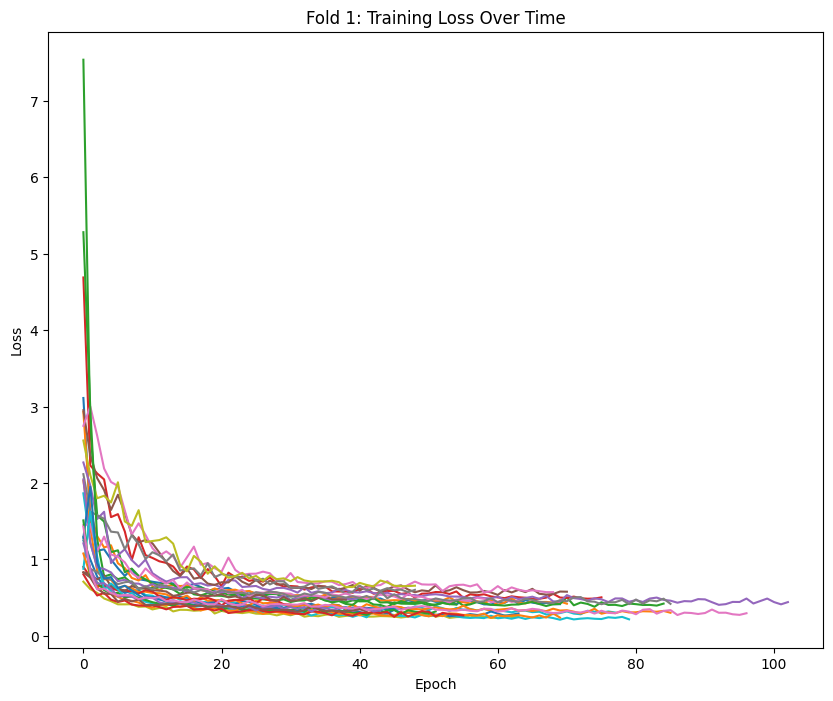

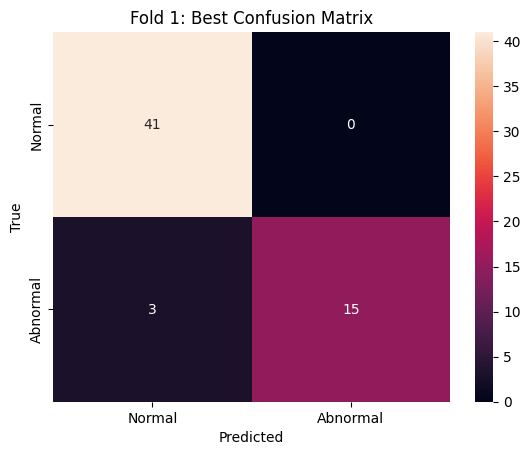

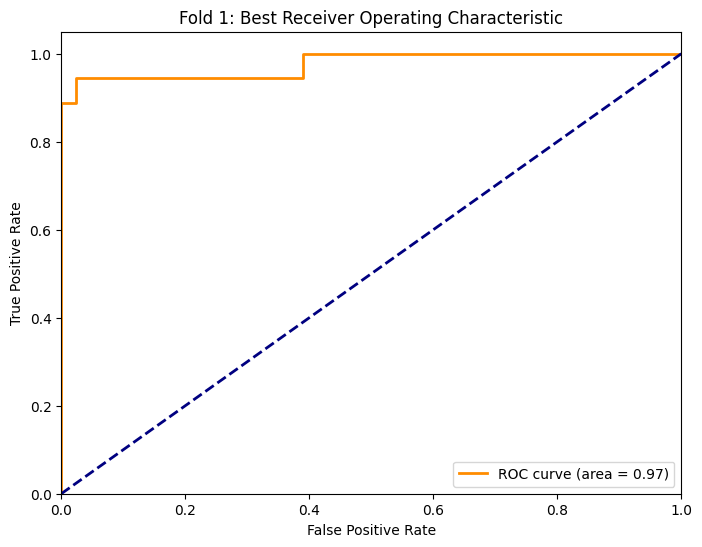

Fold 2/5
(1) Training with params: weight_decay = 0.0001, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 91
(2) Training with params: weight_decay = 1e-05, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 71
(3) Training with params: weight_decay = 1e-06, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 50
(4) Training with params: weight_decay = 0.0001, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 109
(5) Training with params: weight_decay = 1e-05, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 64
(6) Training with params: weight_decay = 1e-06, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 110
(7) Training with params: weight_decay = 0.0001, learning_rate = 0.0005, dropout = 0.5
    Early stopping at epoch 39
(8) Training with params: weight_decay = 1e-05, learning_rate = 0.0005, dropout = 0.5
    Early stopping at epoch 75
(9) Training with params: weight_decay = 1e-06, learning

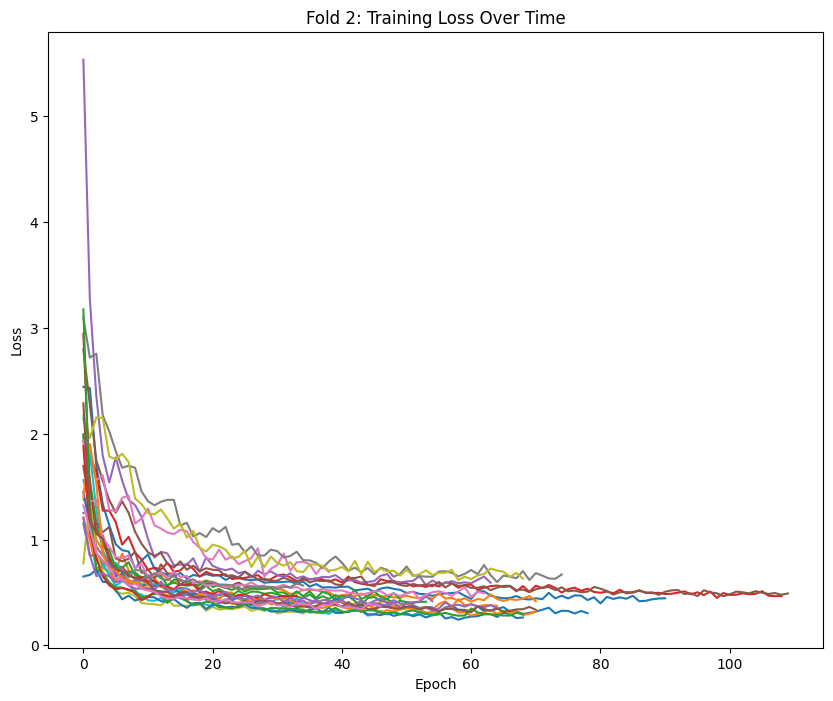

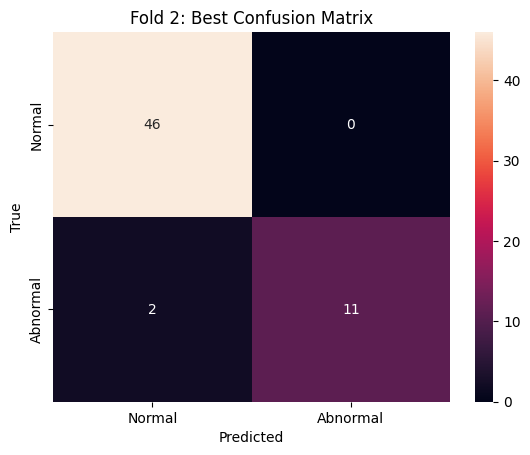

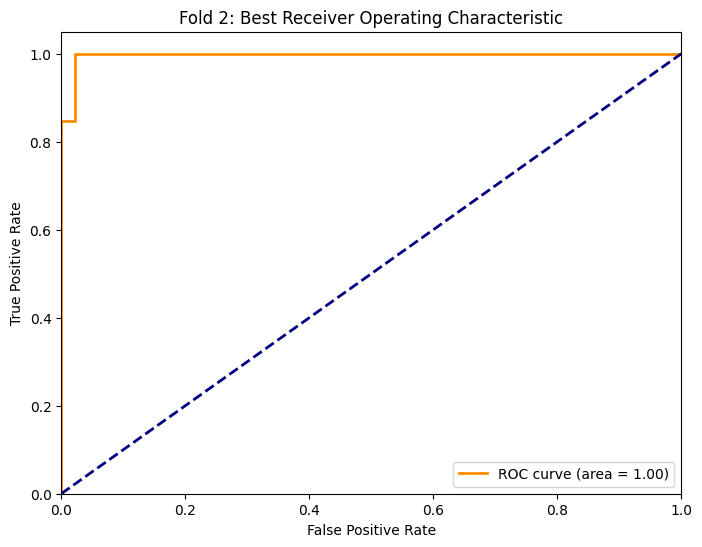

Fold 3/5
(1) Training with params: weight_decay = 0.0001, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 35
(2) Training with params: weight_decay = 1e-05, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 51
(3) Training with params: weight_decay = 1e-06, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 72
(4) Training with params: weight_decay = 0.0001, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 57
(5) Training with params: weight_decay = 1e-05, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 76
(6) Training with params: weight_decay = 1e-06, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 30
(7) Training with params: weight_decay = 0.0001, learning_rate = 0.0005, dropout = 0.5
    Early stopping at epoch 57
(8) Training with params: weight_decay = 1e-05, learning_rate = 0.0005, dropout = 0.5
    Early stopping at epoch 61
(9) Training with params: weight_decay = 1e-06, learning_r

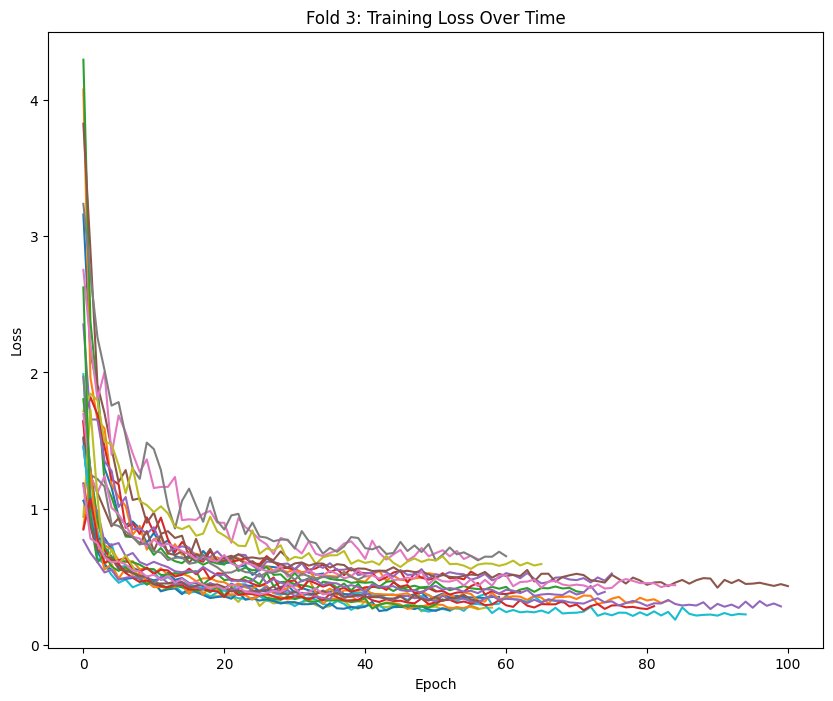

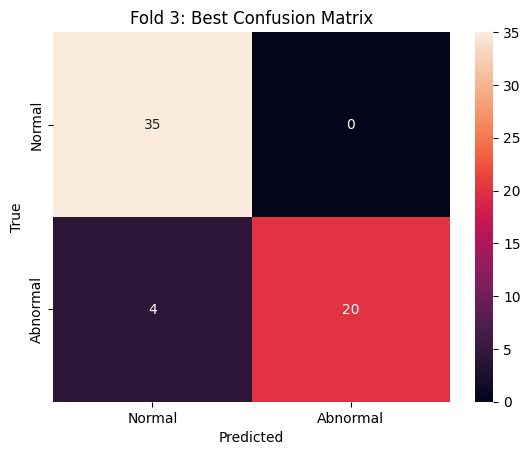

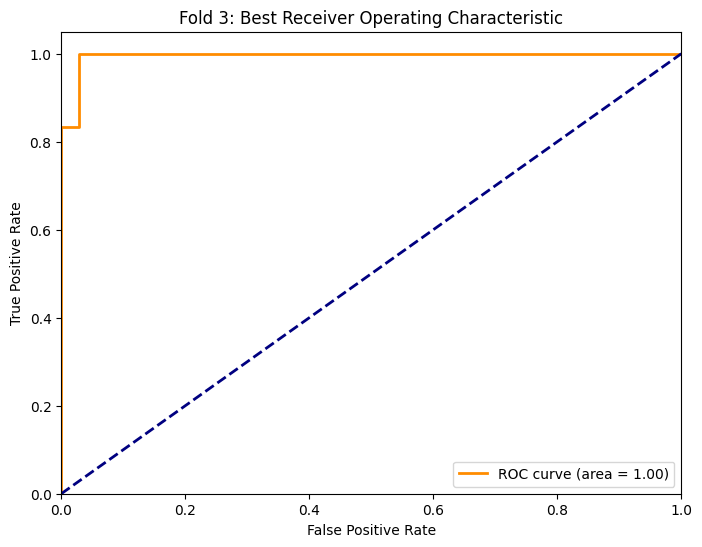

Fold 4/5
(1) Training with params: weight_decay = 0.0001, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 52
(2) Training with params: weight_decay = 1e-05, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 94
(3) Training with params: weight_decay = 1e-06, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 83
(4) Training with params: weight_decay = 0.0001, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 71
(5) Training with params: weight_decay = 1e-05, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 75
(6) Training with params: weight_decay = 1e-06, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 111
(7) Training with params: weight_decay = 0.0001, learning_rate = 0.0005, dropout = 0.5
    Early stopping at epoch 60
(8) Training with params: weight_decay = 1e-05, learning_rate = 0.0005, dropout = 0.5
    Early stopping at epoch 52
(9) Training with params: weight_decay = 1e-06, learning_

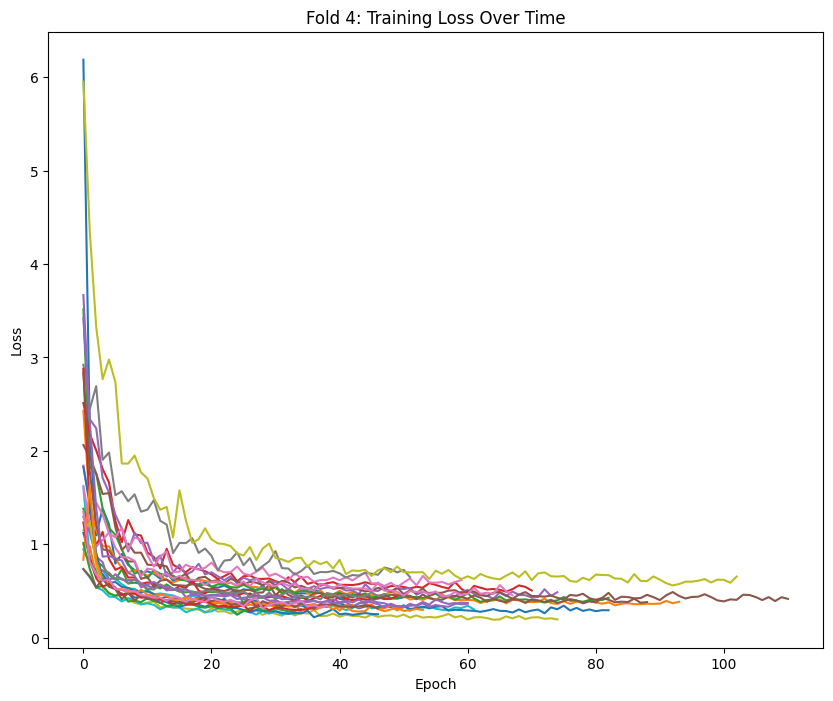

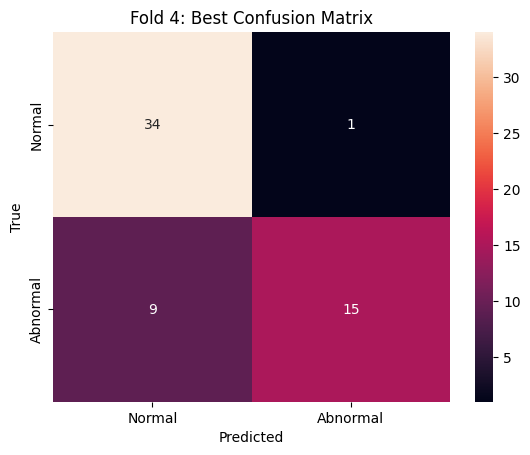

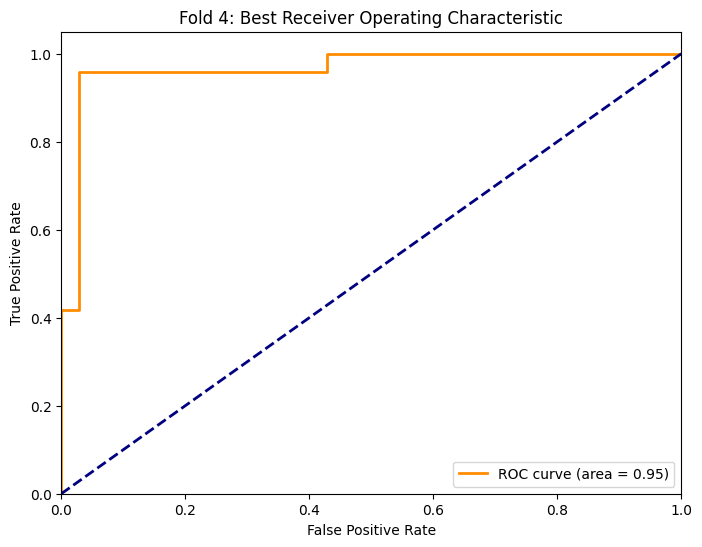

Fold 5/5
(1) Training with params: weight_decay = 0.0001, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 84
(2) Training with params: weight_decay = 1e-05, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 78
(3) Training with params: weight_decay = 1e-06, learning_rate = 0.002, dropout = 0.5
    Early stopping at epoch 119
(4) Training with params: weight_decay = 0.0001, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 35
(5) Training with params: weight_decay = 1e-05, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 89
(6) Training with params: weight_decay = 1e-06, learning_rate = 0.001, dropout = 0.5
    Early stopping at epoch 58
(7) Training with params: weight_decay = 0.0001, learning_rate = 0.0005, dropout = 0.5
    Early stopping at epoch 45
(8) Training with params: weight_decay = 1e-05, learning_rate = 0.0005, dropout = 0.5
    Early stopping at epoch 38
(9) Training with params: weight_decay = 1e-06, learning_

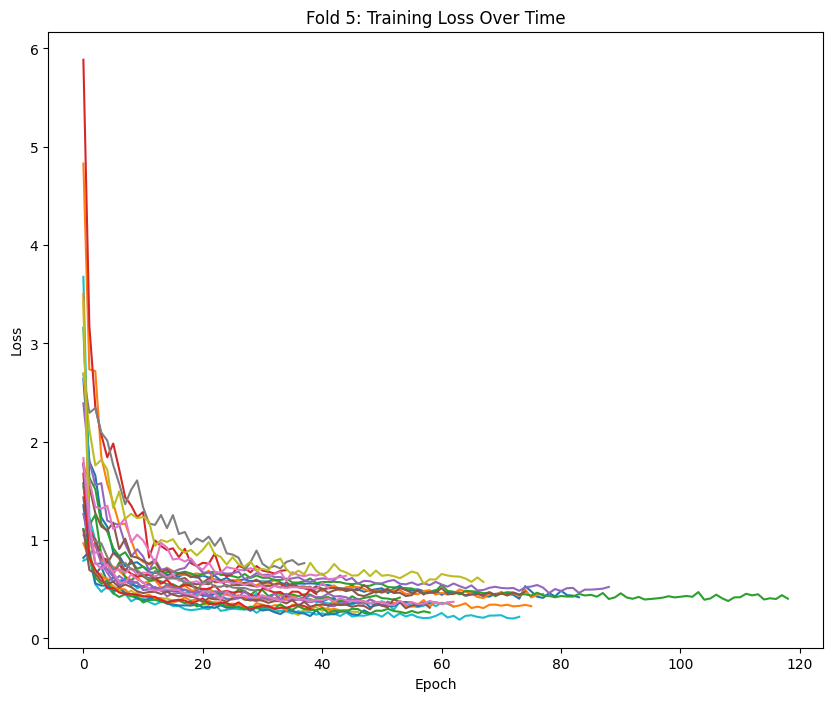

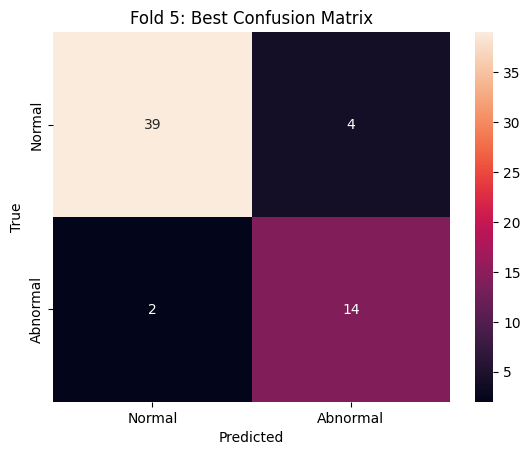

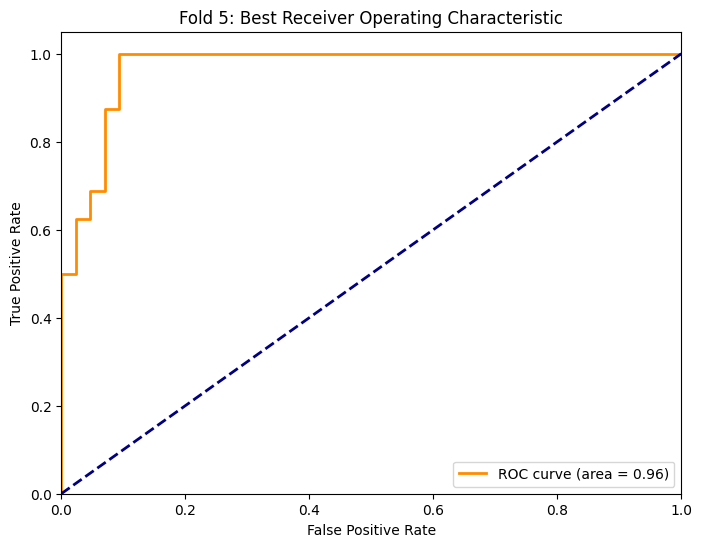

In [23]:
# Define the number of folds for cross-validation
k_folds = 5
kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)

# Initialize metrics to collect results from each fold
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

param_grid = {
    'learning_rate': [0.002, 0.001, 0.0005],
    'weight_decay': [1e-4, 1e-5, 1e-6],
    'dropout': [0.5, 0.3, 0.1]
}

# Perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(node_features)):
    print(f'Fold {fold + 1}/{k_folds}')

    # Create lists to hold the results for plotting
    Count = 1
    loss_values_folds = []
    confusion_matrices = []
    roc_curves = []
    
    # Split data
    X_train, X_test = node_features[train_index], node_features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Create Data objects for training and testing sets
    train_data = create_graph_data(X_train, y_train)
    test_data = create_graph_data(X_test, y_test)
    
    # Create DataLoader instances
    train_loader = GeometricDataLoader([train_data], batch_size = 1, shuffle = True)
    test_loader = GeometricDataLoader([test_data], batch_size = 1, shuffle = False)

    best_params = None
    best_fold_metrics = None
    best_fold_loss = float('inf')


    # Iterate over parameter combinations
    for params in ParameterGrid(param_grid):
        learning_rate = params['learning_rate']
        weight_decay = params['weight_decay']
        dropout = params['dropout']

        # Print the parameters being used
        print(f'({Count}) Training with params: weight_decay = {weight_decay}, learning_rate = {learning_rate}, dropout = {dropout}')
    
        # Initialize the model with the current set of parameters
        model = AdvancedGNNModel(num_node_features = 12, num_classes = 2, dropout = dropout)
        optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = weight_decay)
        criterion = torch.nn.CrossEntropyLoss()
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.9)
    
        # Train the model with early stopping
        epochs = 200
        early_stopping_patience = 10
        best_loss = float('inf')
        patience_counter = 0
        loss_values = []
        
        for epoch in range(epochs):
            model.train()
            epoch_loss = 0
            for batch in train_loader:
                optimizer.zero_grad()
                out = model(batch)
                loss = criterion(out, batch.y)
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm = 2.0)
                optimizer.step()
                epoch_loss += loss.item()
            scheduler.step()
            loss_values.append(epoch_loss / len(train_loader))
            
            # Early stopping
            epoch_loss /= len(train_loader)
            if epoch_loss < best_loss:
                best_loss = epoch_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= early_stopping_patience:
                    print(f"    Early stopping at epoch {epoch+1}")
                    Count = Count + 1
                    break

        # Save the loss values for this fold
        loss_values_folds.append(loss_values)
        
        # Evaluate the model
        model.eval()
        true_labels = []
        predictions = []
        probs = []
        
        with torch.no_grad():
            for batch in test_loader:
                out = model(batch)
                _, pred = out.max(dim = 1)
                predictions.extend(pred.tolist())
                true_labels.extend(batch.y.tolist())
                probs.extend(F.softmax(out, dim = 1)[:, 1].tolist())
         
        # Convert lists to numpy arrays for metric calculation
        true_labels = np.array(true_labels)
        predictions = np.array(predictions)
        probs = np.array(probs)
        
        # Calculate metrics
        test_accuracy = accuracy_score(true_labels, predictions)
        test_precision = precision_score(true_labels, predictions, average = 'macro', zero_division = 0)
        test_recall = recall_score(true_labels, predictions, average = 'macro', zero_division = 0)
        test_f1 = f1_score(true_labels, predictions, average = 'macro', zero_division = 0)
        fpr, tpr, _ = roc_curve(true_labels, probs)
        test_roc_auc = auc(fpr, tpr)

        # Check if this parameter combination is the best for this fold
        if best_loss < best_fold_loss:
            best_fold_loss = best_loss
            best_params = params
            best_true_labels = true_labels
            best_predictions = predictions
            best_probs = probs
            best_fold_metrics = {
                'accuracy': test_accuracy,
                'precision': test_precision,
                'recall': test_recall,
                'f1': test_f1,
                'roc_auc': test_roc_auc
            }
    
    # Collect metrics for this fold
    accuracies.append(best_fold_metrics['accuracy'])
    precisions.append(best_fold_metrics['precision'])
    recalls.append(best_fold_metrics['recall'])
    f1s.append(best_fold_metrics['f1'])
    roc_aucs.append(best_fold_metrics['roc_auc'])

    print(f'Fold {fold + 1} - Best Params: {best_params}')
    print(f'Fold {fold + 1} - Accuracy: {best_fold_metrics["accuracy"]:.4f}, Precision: {best_fold_metrics["precision"]:.4f}, Recall: {best_fold_metrics["recall"]:.4f}, F1 Score: {best_fold_metrics["f1"]:.4f}, ROC AUC: {best_fold_metrics["roc_auc"]:.4f}')

    plt.figure(figsize = (10, 8))
    for loss_values in loss_values_folds:
        plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold + 1}: Training Loss Over Time')
    plt.show()

    # Plot confusion matrix
    cm = confusion_matrix(best_true_labels, best_predictions)
    sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = ['Normal', 'Abnormal'], yticklabels = ['Normal', 'Abnormal'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Fold {fold + 1}: Best Confusion Matrix')
    plt.show()

    # Plot ROC curve and calculate AUC
    best_fpr, best_tpr, _ = roc_curve(best_true_labels, best_probs)
    best_roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(best_fpr, best_tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {best_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Fold {fold + 1}: Best Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [24]:
print(f'\nCross-Validation Results:')
# Print overall metrics
print(f'Overall Metrics:')
print(f'Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}')
print(f'Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}')
print(f'Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}')
print(f'F1 Score: {np.mean(f1s):.4f} ± {np.std(f1s):.4f}')
print(f'ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}')


Cross-Validation Results:
Overall Metrics:
Accuracy: 0.9153 ± 0.0479
Precision: 0.9245 ± 0.0501
Recall: 0.8891 ± 0.0468
F1 Score: 0.8998 ± 0.0508
ROC AUC: 0.9810 ± 0.0127


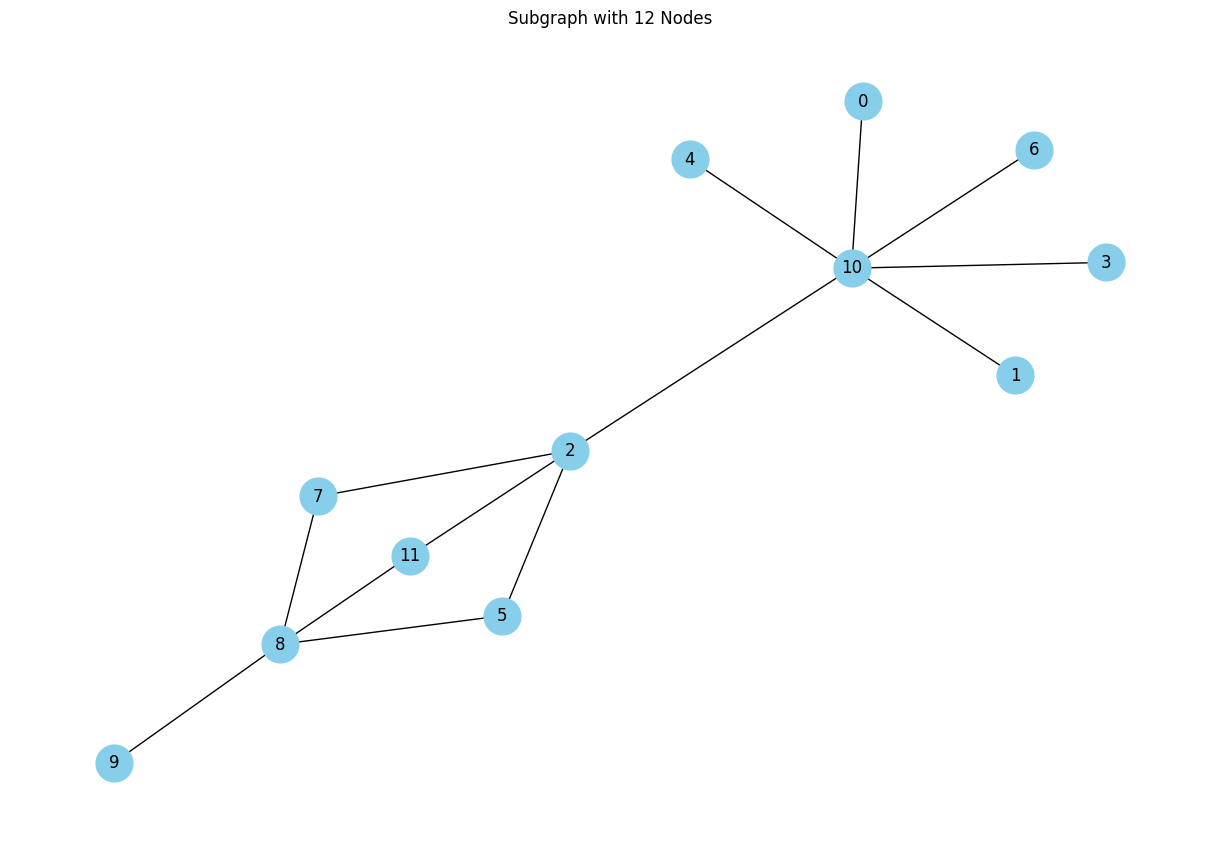

In [25]:
# Visualize subgraph
visualize_graph(create_custom_edge_index(), num_nodes = 12)

In [26]:
# Visualize the original and synthetic data
def plot_distribution(X_original, y_original, X_synthetic, y_synthetic):
    features = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius",
                "degree_spondylolisthesis", "pelvic_slope", "Direct_tilt", "thoracic_slope", "cervical_tilt",
                "sacrum_angle", "scoliosis_slope"]
    
    fig, axs = plt.subplots(len(features), 2, figsize=(15, 30))

    for i, feature in enumerate(features):
        sns.histplot(X_original[:, i], kde=True, color='blue', label='Original', ax=axs[i, 0])
        sns.histplot(X_synthetic[:, i], kde=True, color='red', label='Synthetic', ax=axs[i, 0])
        axs[i, 0].set_title(f'Histogram of {feature}')
        axs[i, 0].legend()
        
        sns.kdeplot(X_original[:, i], color='blue', label='Original', ax=axs[i, 1])
        sns.kdeplot(X_synthetic[:, i], color='red', label='Synthetic', ax=axs[i, 1])
        axs[i, 1].set_title(f'KDE of {feature}')
        axs[i, 1].legend()

    plt.tight_layout()
    plt.show()

# Generate synthetic data by averaging a given number of samples
def create_averaged_data(X, y, window_size):
    n_samples = X.shape[0] // window_size
    X_averaged = np.array([X[i*window_size:(i+1)*window_size].mean(axis=0) for i in range(n_samples)])
    y_averaged = np.array([np.bincount(y[i*window_size:(i+1)*window_size]).argmax() for i in range(n_samples)])
    return X_averaged, y_averaged

Predicting Unknown Data

Accuracy: 0.8667
Precision: 0.9167
Recall: 0.8000
F1 Score: 0.8295
ROC AUC: 0.7800


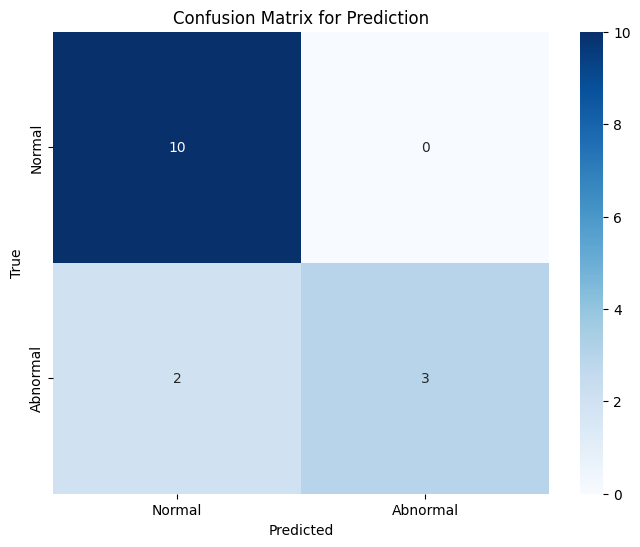

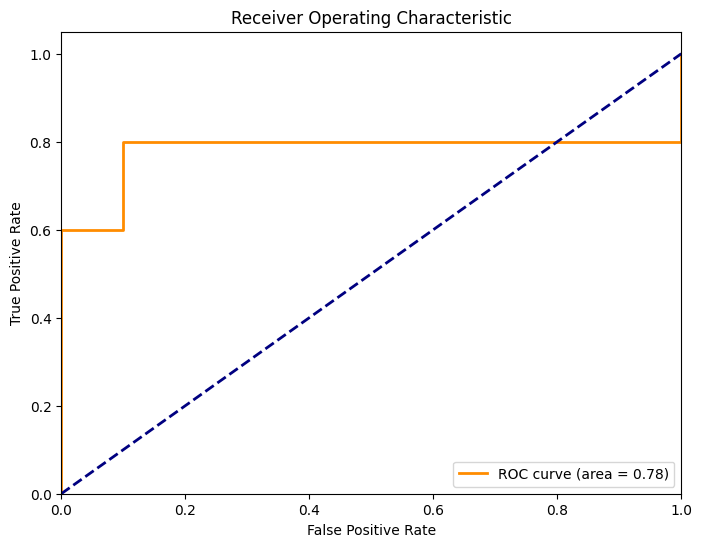

In [29]:
# Extract unknown evaluation data (first 10 rows and last 5 rows combined)
unknown_features = torch.tensor(
    np.vstack((InputData.iloc[:10, 1:13].values, InputData.iloc[-5:, 1:13].values)),
    dtype=torch.float
)
unknown_labels = torch.tensor(
    np.concatenate((InputData.iloc[:10, 14].values, InputData.iloc[-5:, 14].values)),
    dtype=torch.long
)

# Create Data object for combined data
unknown_graph_data = create_graph_data(unknown_features, unknown_labels)

# Create DataLoader instance
unknown_data_loader = GeometricDataLoader([unknown_graph_data], batch_size=1, shuffle=False)

model.eval()

# Evaluate the model with combined data
unknown_predictions = []
unknown_probs = []

with torch.no_grad():
    for batch in unknown_data_loader:
        output = model(batch)
        _, pred = output.max(dim=1)
        unknown_predictions.extend(pred.tolist())
        unknown_probs.extend(torch.softmax(output, dim=1)[:, 1].tolist())

# Convert lists to numpy arrays for metric calculation
unknown_predictions = np.array(unknown_predictions)
unknown_probs = np.array(unknown_probs)

# Calculate metrics
synthetic_accuracy = accuracy_score(unknown_labels, unknown_predictions)
synthetic_precision = precision_score(unknown_labels, unknown_predictions, average='macro', zero_division=0)
synthetic_recall = recall_score(unknown_labels, unknown_predictions, average='macro', zero_division=0)
synthetic_f1 = f1_score(unknown_labels, unknown_predictions, average='macro', zero_division=0)
fpr, tpr, _ = roc_curve(unknown_labels, unknown_probs)
synthetic_roc_auc = auc(fpr, tpr)

print(f'Accuracy: {synthetic_accuracy:.4f}')
print(f'Precision: {synthetic_precision:.4f}')
print(f'Recall: {synthetic_recall:.4f}')
print(f'F1 Score: {synthetic_f1:.4f}')
print(f'ROC AUC: {synthetic_roc_auc:.4f}')

# Plot the confusion matrix
cm = confusion_matrix(unknown_labels, unknown_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Prediction')
plt.show()

# Plot ROC curve and calculate AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {synthetic_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

LIME Explanation

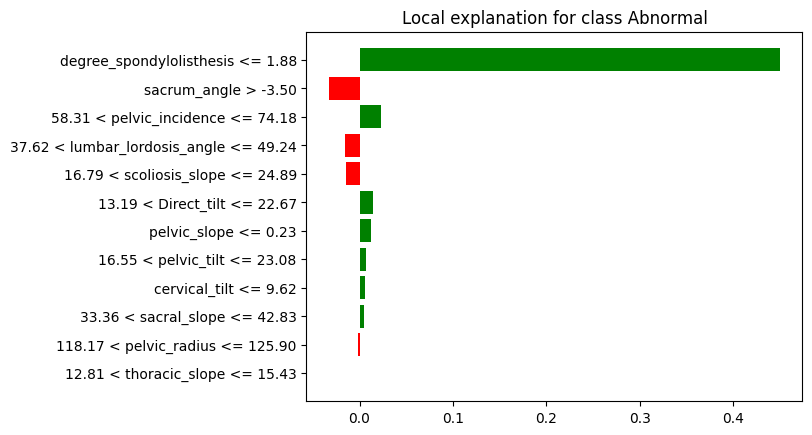

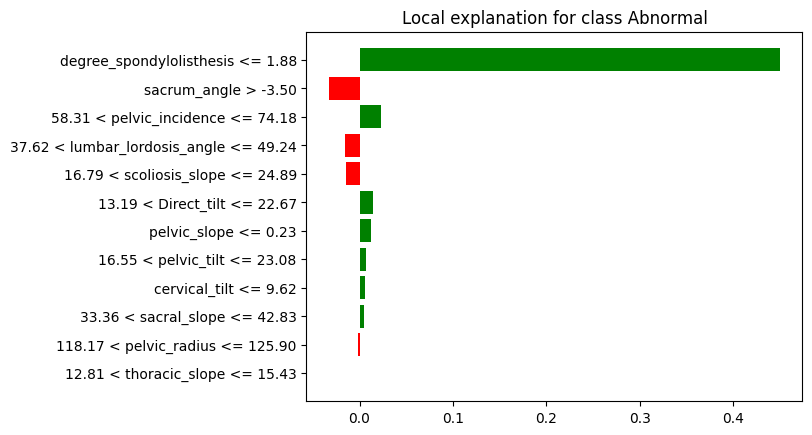

In [30]:
# Convert your torch model's prediction to work with LIME
def gnn_predict_proba(data):
    # data here is expected to be a numpy array for compatibility with LIME
    data_tensor = torch.tensor(data, dtype=torch.float)
    edge_index = torch.tensor([[0],[0]], dtype=torch.long)
    output = model(Data(x=data_tensor, edge_index=edge_index))
    # Converting log probabilities to probabilities for LIME
    proba = F.softmax(output, dim=1).detach().numpy()
    return proba

# Prepare the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train.numpy(),  # Ensure the data is float
    feature_names = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius",
                     "degree_spondylolisthesis", "pelvic_slope", "Direct_tilt", "thoracic_slope", "cervical_tilt",
                     "sacrum_angle", "scoliosis_slope"],
    class_names=['Normal', 'Abnormal'],
    mode='classification'
)

# Choose an instance to explain
i = np.random.randint(0, unknown_features.shape[0])
exp = explainer.explain_instance(unknown_features[i].numpy(), gnn_predict_proba, num_features = 12)

# Display the explanation in the notebook
exp.show_in_notebook(show_table=True, show_all=False)
exp.as_pyplot_figure()